In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

### **Question 1: Perform a visual analysis of the dataset. Plot the time series of Bitcoin prices over the 12 months.**

[*********************100%%**********************]  1 of 1 completed


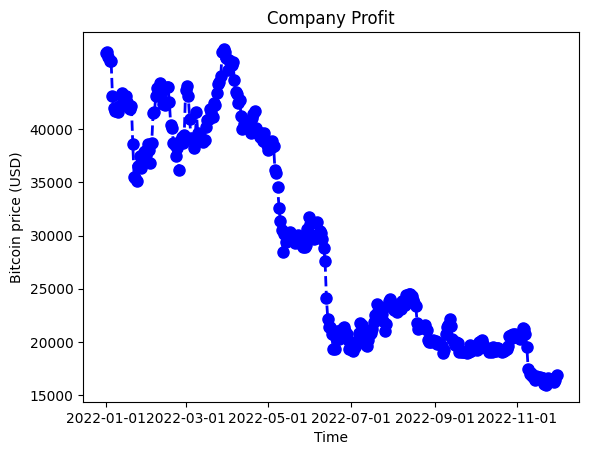

In [33]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

data = yf.download('BTC-USD', start='2022-01-01', end='2022-12-01', interval='1h')

# Convert the index (date) column to a datetime object
data.index = pd.to_datetime(data.index)

# Optionally, resample the data to a specific frequency if needed
data = data.resample('D').mean()  # Resample to daily frequency

plt.plot(data.index, data['Close'], '--b', marker='o', markersize=8, markerfacecolor='blue', markeredgecolor='blue', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Bitcoin price (USD)')
plt.title('Company Profit')
plt.yticks(np.arange(15000, 45000, step=5000))
plt.xticks(np.array(['2022-01', '2022-03', '2022-05', '2022-07', '2022-09', '2022-11']))
plt.show()

### **Question 2: Before applying ARIMA, what steps would you take to make the time series stationary? Do them all**

In [34]:
# Perform the Dickey-Fuller test for stationarity
result = sm.tsa.stattools.adfuller(data['Close'])

# Print the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Check if the p-value is less than a significance level (e.g., 0.05) to determine stationarity
if result[1] <= 0.05:
    print('The time series is stationary.')
else:
    print('The time series is non-stationary.')

ADF Statistic: -1.4464204427723277
p-value: 0.5598305508057728
The time series is non-stationary.


Difference the time series if it is non-stationary

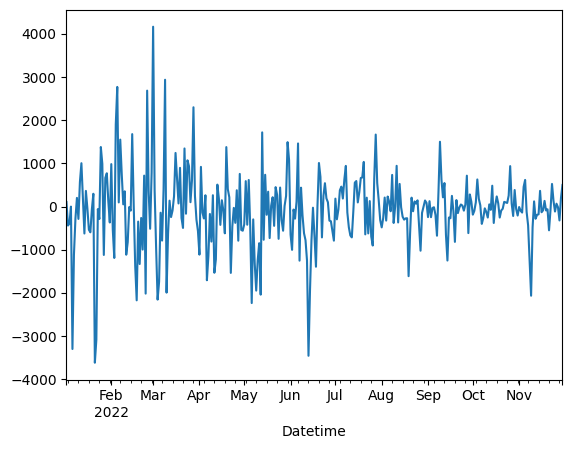

In [35]:
# If the time series is non-stationary, apply differencing to make it stationary
differenced_data = data['Close'].diff().dropna()

# Plot the differenced time series
differenced_data.plot()
plt.show()

In [36]:
# Perform the Dickey-Fuller test for stationarity
result = sm.tsa.stattools.adfuller(differenced_data)

# Print the test statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Check if the p-value is less than a significance level (e.g., 0.05) to determine stationarity
if result[1] <= 0.05:
    print('The time series is stationary.')
else:
    print('The time series is non-stationary.')

ADF Statistic: -14.517092265891119
p-value: 5.6019586019506396e-27
The time series is stationary.


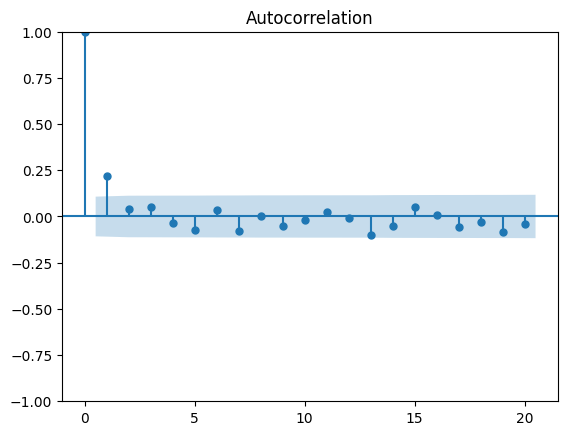

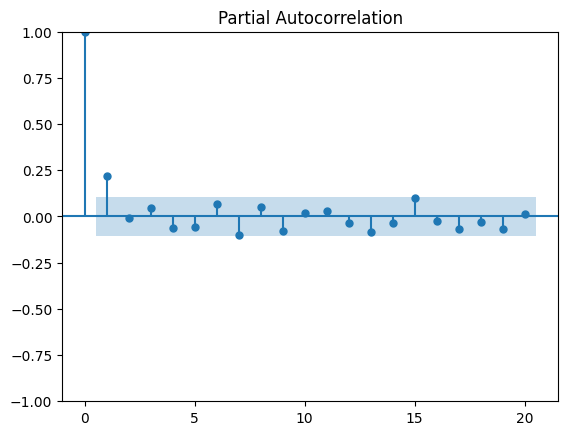

In [38]:
# Plot the ACF and PACF to estimate the order of the ARIMA model
sm.graphics.tsa.plot_acf(differenced_data, lags=20)
plt.show()

sm.graphics.tsa.plot_pacf(differenced_data, lags=20)
plt.show()

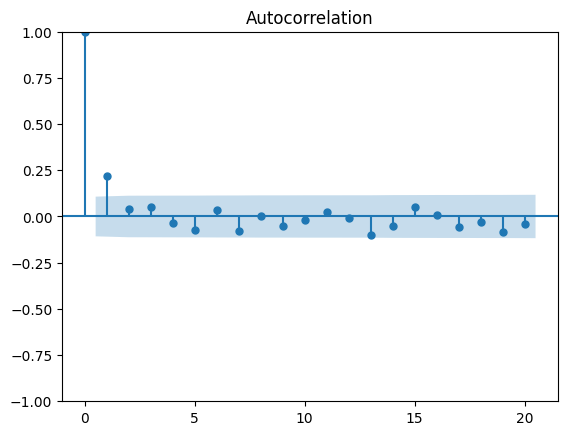

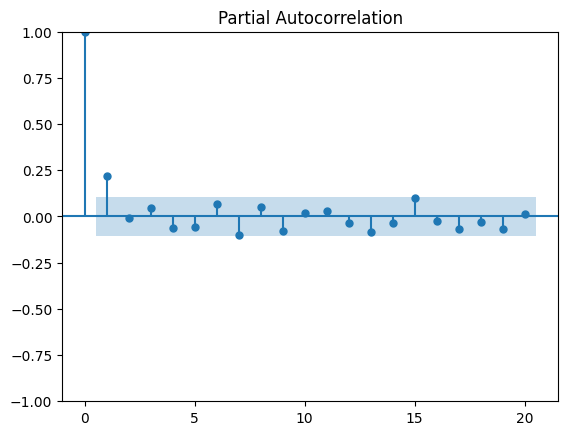

In [39]:
# Plot the ACF and PACF to estimate the order of the ARIMA model
sm.graphics.tsa.plot_acf(differenced_data, lags=20)
plt.show()

sm.graphics.tsa.plot_pacf(differenced_data, lags=20)
plt.show()

In [12]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.8 MB/s eta 0:00:00


### **Question 3: Apply the ARIMA model to the dataset. Choose appropriate values for p, d, and q.**

In [40]:
import pmdarima as pm

# Determine the optimal values of p, d, and q using auto_arima
model = pm.auto_arima(differenced_data, seasonal=False, trace=True)

# Print the model summary
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5448.400, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5458.740, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5442.957, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5443.402, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5444.960, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5444.975, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5446.808, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5442.700, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5457.136, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5444.688, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5444.701, Time=0.12 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5442.999, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5446.704, Time=0.40 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.205 seconds
                      

### **Question 4: Forecast the Bitcoin price for the next 3 hours using your ARIMA model.**

In [29]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# Create an ARIMA model with the determined order
model = ARIMA(differenced_data, order=(1,0,0))  # Replace p, d, q with the determined values

# Fit the ARIMA model to the data
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  333
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2718.350
Date:                Sun, 08 Oct 2023   AIC                           5442.700
Time:                        14:10:58   BIC                           5454.124
Sample:                    01-02-2022   HQIC                          5447.255
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -90.7952     59.895     -1.516      0.130    -208.187      26.596
ar.L1          0.2193      0.039      5.582      0.000       0.142       0.296
sigma2      7.231e+05   3.22e+04     22.459      0.0

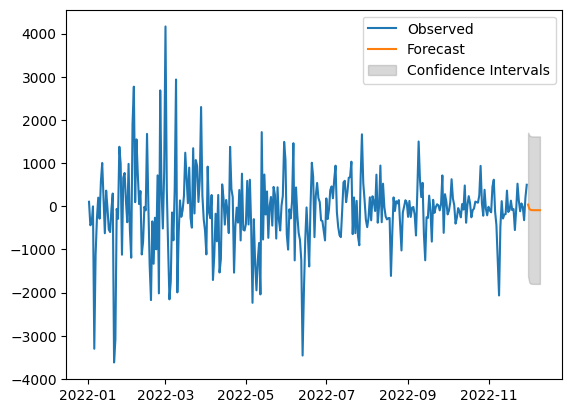

In [30]:
# Forecast future values
forecast = model_fit.get_forecast(steps=10)  # Replace "steps" with the desired number of future steps

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plot the forecasted values
plt.plot(differenced_data.index, differenced_data, label='Observed')
plt.plot(forecast_values.index, forecast_values, label='Forecast')
plt.fill_between(
    confidence_intervals.index,
    confidence_intervals.iloc[:, 0],
    confidence_intervals.iloc[:, 1],
    color='gray',
    alpha=0.3,
    label='Confidence Intervals'
)
plt.legend()
plt.show()

In [42]:
predicted = forecast_values

In [45]:
predicted

2022-12-01 00:00:00+00:00    38.418195
2022-12-02 00:00:00+00:00   -62.458953
2022-12-03 00:00:00+00:00   -84.581098
2022-12-04 00:00:00+00:00   -89.432438
2022-12-05 00:00:00+00:00   -90.496327
2022-12-06 00:00:00+00:00   -90.729635
2022-12-07 00:00:00+00:00   -90.780799
2022-12-08 00:00:00+00:00   -90.792019
2022-12-09 00:00:00+00:00   -90.794480
2022-12-10 00:00:00+00:00   -90.795020
Freq: D, Name: predicted_mean, dtype: float64

### **Question 5: Evaluate the performance of your ARIMA model. Calculate and explain appropriate evaluation metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for your forecast.**

In [43]:
import yfinance as yf

data_actual = yf.download('BTC-USD', start='2022-12-01', end='2022-12-30', interval='1h')

# Convert the index (date) column to a datetime object
data_actual.index = pd.to_datetime(data_actual.index)

# Optionally, resample the data to a specific frequency if needed
data_actual = data_actual.resample('D').mean()  # Resample to daily frequency

[*********************100%%**********************]  1 of 1 completed


In [49]:
actual = data_actual['Close'][:10]

In [50]:
import numpy as np

# Assuming 'actual' contains the actual values and 'predicted' contains the predicted values

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(actual - predicted))

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((actual - predicted) ** 2))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 17115.33177368294
RMSE: 17115.673121468557
